# Aprendizaje Supervisado: Laboratorio 1

## Ejercicio 1: SVM con Kernel y Regularización

En este ejercicio se trabajará con datos que esconden un patrón. Los datos mezclan columnas con valores enteros, flotantes y booleanos.

Debe analizar los datos de entrenamiento para encontrar el patrón, y luego entrenar una SVM que explique a la perfección esos datos (accuracy 1.0 en train). Por último, deberá evaluar la SVM en los datos de test, y modificar los parámetros de regularización hasta encontrar una configuración que dé una accuracy mayor a 0.9.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn.decomposition import pca

In [2]:
# cargar datos de entrenamiento y evaluación

train = pd.read_csv('datasets/lab1/ej1_train.csv')
X_train = train.iloc[:, :-1]
Y_train = train['TARGET']
test = pd.read_csv('datasets/lab1/ej1_test.csv')
X_test = test.iloc[:, :-1]
Y_test = test['TARGET']

### Ejercicio 1a:

Primero imprima una descripción básica de los datos.

Luego, calcule y grafique un mapa de calor con la correlación entre los distintos features.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?

Por último, reduzca la dimensionalidad de los datos a dos dimensiones y grafique los puntos.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?


In [3]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,100.567500,101.035000,98.930000,100.445000,98.487500,0.007970,-0.009065,-0.019228,-0.009865,0.03500,0.08750,0.172500,0.237500,0.220000,0.132500,0.075000,0.040000,-0.00500
std,86.549654,49.517155,91.403921,62.199267,36.299366,0.782708,0.560037,0.514925,0.924287,0.18401,0.28292,0.378288,0.426084,0.414765,0.339458,0.263721,0.196205,1.00124
min,-93.000000,-10.000000,-115.000000,-39.000000,11.000000,-1.725988,-1.300851,-1.244842,-2.168412,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,46.000000,73.000000,37.500000,61.750000,73.000000,-0.488926,-0.366255,-0.382066,-0.646990,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
50%,100.500000,100.000000,100.000000,100.000000,99.500000,0.005970,-0.010120,-0.013890,0.000883,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
75%,155.250000,133.250000,153.250000,140.000000,122.000000,0.510675,0.314739,0.300218,0.544438,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,299.000000,217.000000,323.000000,243.000000,185.000000,1.785821,1.369928,1.217912,2.240643,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


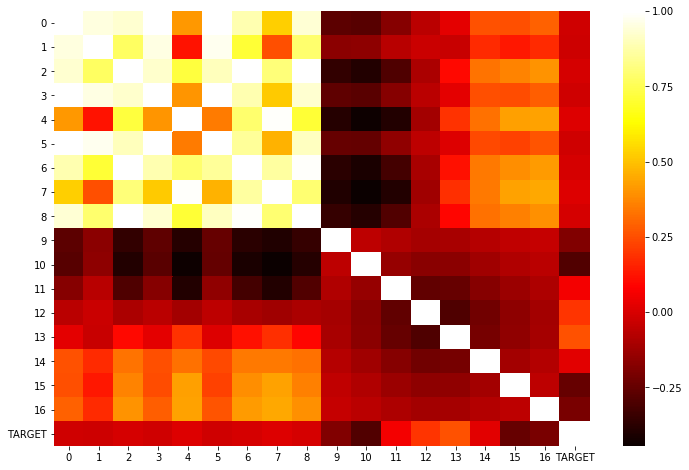

In [4]:
# COMPLETAR: calcular y graficar correlación entre features
# AYUDA: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(ax=ax, data=train.corr(), cmap="hot");

### Preguntas:

**¿Qué observa?**

**¿Qué conclusiones puede extraer?**

Las feautres 0 a 8 se encuentran muy correlacionadas entre sí. Con lo cual se podría elegir un subset de las mismas.


In [5]:
# COMPLETAR: reducir dimensionalidad y graficar

X_train_reduce = pca.PCA(n_components=2).fit_transform(X_train)
X_train_reduce.shape

(400, 2)

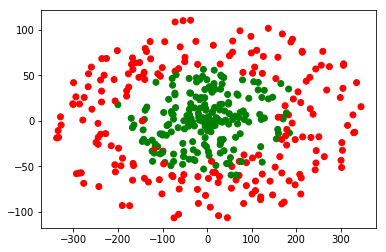

In [6]:
cmap_back = ListedColormap(['red', 'green']);
plt.scatter(X_train_reduce[:,0], X_train_reduce[:,1], c=Y_train, cmap=cmap_back);

### Preguntas:
**¿Qué observa?**

**¿Qué conclusiones puede extraer?**

Al reducir la dimencionalidad y graficar se ve que el problema no es linealmente separable.

### Ejercico 1b:

Primero calcule la accuracy sobre train para una SVM con kernel lineal.

**Preguntas:**
- ¿Cuál es la accuracy?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

Modifique la SVM para lograr una accuracy en train de 1.0.

In [7]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
clf = LinearSVC(random_state=0)  # CAMBIAR!
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))

Accuracy en train:	 0.5025


El modelo parece sufrir de BIAS ya que tiene un error grande sobre los datos de entrenamiento.

In [8]:
#Modificacion de la SVM para lograr una accuracy en train de 1.0
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(C=1.0, kernel='rbf', degree=3,random_state=0) 
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))

Accuracy en train:	 1.0


### Ejercicio 1c:

Evalúe la SVM del ítem anterior sobre los datos de test.

**Preguntas:**
- ¿Cuál es la accuracy en test?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

Modifique parámetros de la SVM para lograr una accuracy en test mayor a 0.9.
La accuracy en train puede ser menos de 1.0.

Puede buscar los valores apropiados a mano o usar grid search.

In [9]:
clf = SVC(C=1.0, kernel='rbf', degree=3,random_state=0) # CAMBIAR!
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

Accuracy en train:	 1.0
Accuracy en test:	 0.7


El modelo al cual arribamos en el punto anterior, si bien soluciono el problema del BIAS, no generaliza bien con lo cual se puede decir que sufre de alta varianza. A cotinuación se realizara un refinamiento sobre los hiperparametros del modelo para llegar al accuracy deseado (accuracy de test mayor a 0.9)

In [10]:
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(kernel='rbf', random_state=0)

params = {"C":[50, 20, 10, 1.0, 0.1, 0.01, 0.001, 0.0005,  0.0001], "degree":[2, 3], "gamma":[3, 1, 0.5, 0.1,0.01, 0.001,0.0001, 0.00001]}

clf = GridSearchCV(svm_clf, param_grid=params, n_jobs=4, cv=5, scoring="accuracy")

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

Accuracy en train:	 0.95
Accuracy en test:	 0.91


## Ejercicio 2: Revisitando el Titanic

Este ejercicio se basa en el siguiente análisis de datos visto en clase:

- https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/notebook

Aquí, se logra entrenar una Random Forest con un out-of-bag score de 0.8294.


### Ejercicio 2a:

El objetivo de este ejercicio es ver cuánto da el score si no se quiere hacer ninguna preparación de los datos.

Para esto, deben eliminarse las columnas que no tienen datos numéricos y las que tienen datos incompletos, ya que los algoritmos de aprendizaje automático no saben lidiar con ellos.

In [235]:
# cargar los datos
import pandas as pd
import numpy as np
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [236]:
del train['PassengerId']  # eliminar ids

# COMPLETAR: eliminar las columnas que no tienen números, y las que tienen datos incompletos.

# Se eliminan columnas con datos categoricos
del train['Name']
del train['Sex']
del train['Ticket']
del train['Cabin']
del train['Embarked']

# Se eliminan columnas con datos faltantes
# Se unifica None, NaN y NaT a NaN 
train[train.isnull()==True] = np.nan
train = train.dropna(axis=1)


In [237]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [238]:
# entrenar la misma Random Forest, e imprimir el out-of-bag score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7172


### Ejercicio 2b:

En este ejercicio deberá hacer tres mejoras en la preparación de los datos:

- Completar la columna "Age" y usarla.
- Agregar una nueva columna con el largo del nombre.
- Convertir la columna "Sex" a valores numéricos y usarla.

Calcular el OOB score de cada una de las mejoras por separado.

**Responda**: ¿Cuál de las tres mejoras aporta más?

In [239]:
# cargar nuevamente los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [240]:
train_age = train.copy()

### Age

In [241]:
# COMPLETAR: completar con el valor medio los datos faltantes en el campo Age
train_age['Age'] = train_age.Age.transform(lambda x: x.fillna(x.mean()))

In [242]:
train_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [243]:
del train_age['PassengerId']
del train_age['Name']
del train_age['Sex']
del train_age["Ticket"]
del train_age['Cabin']
del train_age['Embarked']

In [244]:
train_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


In [245]:
# EJECUTAR ESTO TRES VECES, UNA VEZ PARA CADA MEJORA.
# entrenar el Random Forest, e imprimir out-of-bag score

# Ejecucion con Age
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train_age.iloc[:, 1:], train_age.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7250


### Sex

In [267]:
train_sex = train.copy()
train_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [268]:
# COMPLETAR: poner 1 en lugar de 'female' y 0 en lugar de 'male'
# AYUDA: DEFINIR LA FUNCIÓN f Y HACER:
# train['Sex'] = train['Sex'].apply(f)
def sex_to_number(x):
    if x == 'male':
        x = 1
    elif x=='female':
        x = 0
    return x

In [269]:
train_sex["Sex"] = train_sex.Sex.apply(func=sex_to_number)


In [270]:
# COMPLETAR: eliminar las columnas que deban ser eliminadas
train_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [271]:
del train_sex['PassengerId']
del train_sex['Name']
del train_sex["Ticket"]
del train_sex['Cabin']
del train_sex['Embarked']
train_sex = train_sex.dropna()

In [272]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train_sex.iloc[:, 1:], train_sex.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8235


### Largo del nombre

In [273]:
train_name = train.copy()
train_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [274]:
# COMPLETAR: agregar columna con el largo del nombre
train_name["Name_lenght"] = train_name.Name.apply(func=lambda x: len(x))

In [275]:
train_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Name_lenght    891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [276]:
del train_name['PassengerId']
del train_name['Name']
del train_name['Sex']
del train_name["Ticket"]
del train_name['Cabin']
del train_name['Embarked']
train_name = train_name.dropna()

In [277]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train_name.iloc[:, 1:], train_name.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7647


#### ¿Cuál de las tres mejoras aporta más?

Las mejora que más aporta es el Sexo, siguiendola el largo del nombre y por último la edad.

- OOB sin nuevas features: 0.7172

1) OOB agregando Sexo: 0.8235

2) OOB agregando Largo del nombre: 0.7647

3) OOB agregando Age: 0.7250
